In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=611b2e4a6a8ce90e413450facc913501


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khatanga
Processing Record 2 of Set 1 | port macquarie
Processing Record 3 of Set 1 | bykovo
Processing Record 4 of Set 1 | saint george
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | ballina
Processing Record 7 of Set 1 | upernavik
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | kahului
Processing Record 10 of Set 1 | merauke
Processing Record 11 of Set 1 | sobolevo
Processing Record 12 of Set 1 | gladstone
Processing Record 13 of Set 1 | tete
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 21 of Set 1 | katsuura
Processing Record 22 of Set 1 | taolanaro
Cit

City not found. Skipping...
Processing Record 36 of Set 4 | tezu
Processing Record 37 of Set 4 | mecca
Processing Record 38 of Set 4 | bilibino
Processing Record 39 of Set 4 | impfondo
Processing Record 40 of Set 4 | maketu
Processing Record 41 of Set 4 | vao
Processing Record 42 of Set 4 | pitimbu
Processing Record 43 of Set 4 | mrirt
City not found. Skipping...
Processing Record 44 of Set 4 | ornskoldsvik
Processing Record 45 of Set 4 | chapais
Processing Record 46 of Set 4 | hoima
Processing Record 47 of Set 4 | santa rosa
Processing Record 48 of Set 4 | caernarfon
Processing Record 49 of Set 4 | yulara
Processing Record 50 of Set 4 | vanimo
Processing Record 1 of Set 5 | qaanaaq
Processing Record 2 of Set 5 | codrington
Processing Record 3 of Set 5 | humaita
Processing Record 4 of Set 5 | kovdor
Processing Record 5 of Set 5 | los llanos de aridane
Processing Record 6 of Set 5 | haverfordwest
Processing Record 7 of Set 5 | shimoda
Processing Record 8 of Set 5 | louisbourg
City not f

Processing Record 30 of Set 8 | salalah
Processing Record 31 of Set 8 | longyearbyen
Processing Record 32 of Set 8 | kerki
City not found. Skipping...
Processing Record 33 of Set 8 | baykit
Processing Record 34 of Set 8 | otane
Processing Record 35 of Set 8 | matagami
Processing Record 36 of Set 8 | bemidji
Processing Record 37 of Set 8 | inta
Processing Record 38 of Set 8 | sheboygan
Processing Record 39 of Set 8 | narsaq
Processing Record 40 of Set 8 | salinopolis
Processing Record 41 of Set 8 | cimahi
Processing Record 42 of Set 8 | ilhabela
Processing Record 43 of Set 8 | hokitika
Processing Record 44 of Set 8 | saleaula
City not found. Skipping...
Processing Record 45 of Set 8 | san patricio
Processing Record 46 of Set 8 | kawalu
Processing Record 47 of Set 8 | constitucion
Processing Record 48 of Set 8 | awbari
Processing Record 49 of Set 8 | antofagasta
Processing Record 50 of Set 8 | kayerkan
Processing Record 1 of Set 9 | esperance
Processing Record 2 of Set 9 | maracaibo
Proc

City not found. Skipping...
Processing Record 15 of Set 12 | gamba
Processing Record 16 of Set 12 | kenora
Processing Record 17 of Set 12 | bontang
Processing Record 18 of Set 12 | lukulu
Processing Record 19 of Set 12 | hue
Processing Record 20 of Set 12 | pangkalanbuun
Processing Record 21 of Set 12 | yarega
Processing Record 22 of Set 12 | maykain
City not found. Skipping...
Processing Record 23 of Set 12 | nicoya
Processing Record 24 of Set 12 | eldama ravine
Processing Record 25 of Set 12 | san quintin
Processing Record 26 of Set 12 | pangnirtung
Processing Record 27 of Set 12 | bay roberts
Processing Record 28 of Set 12 | najran
Processing Record 29 of Set 12 | novikovo
Processing Record 30 of Set 12 | zhenjiang
Processing Record 31 of Set 12 | hanyang
Processing Record 32 of Set 12 | morant bay
Processing Record 33 of Set 12 | zaqatala
Processing Record 34 of Set 12 | ulladulla
Processing Record 35 of Set 12 | kirkland lake
Processing Record 36 of Set 12 | eyl
Processing Record 

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khatanga,71.9667,102.5000,-32.28,81,0,14.05,RU,2021-01-18 20:36:53
1,Port Macquarie,-31.4333,152.9167,68.00,100,40,5.75,AU,2021-01-18 20:36:53
2,Bykovo,55.6361,38.0803,3.00,84,40,2.24,RU,2021-01-18 20:36:53
3,Saint George,37.1041,-113.5841,61.00,19,1,4.61,US,2021-01-18 20:36:53
4,Punta Arenas,-53.1500,-70.9167,55.40,62,40,18.41,CL,2021-01-18 20:32:07
5,Ballina,-28.8667,153.5667,68.00,88,78,3.44,AU,2021-01-18 20:36:54
6,Upernavik,72.7868,-56.1549,12.78,91,57,7.87,GL,2021-01-18 20:36:54
7,Vaini,-21.2000,-175.2000,82.40,83,20,9.22,TO,2021-01-18 20:36:54
8,Kahului,20.8947,-156.4700,75.20,73,75,13.80,US,2021-01-18 20:32:57
9,Merauke,-8.4667,140.3333,76.33,88,95,4.61,ID,2021-01-18 20:36:55


In [14]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [15]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Khatanga,RU,2021-01-18 20:36:53,71.9667,102.5000,-32.28,81,0,14.05
1,Port Macquarie,AU,2021-01-18 20:36:53,-31.4333,152.9167,68.00,100,40,5.75
2,Bykovo,RU,2021-01-18 20:36:53,55.6361,38.0803,3.00,84,40,2.24
3,Saint George,US,2021-01-18 20:36:53,37.1041,-113.5841,61.00,19,1,4.61
4,Punta Arenas,CL,2021-01-18 20:32:07,-53.1500,-70.9167,55.40,62,40,18.41
...,...,...,...,...,...,...,...,...,...
545,Hualmay,PE,2021-01-18 20:38:42,-11.0964,-77.6139,74.57,71,95,9.55
546,Kathu,TH,2021-01-18 20:38:42,7.9178,98.3332,82.99,73,20,6.91
547,Nishihara,JP,2021-01-18 20:38:42,26.1842,127.7558,55.40,62,20,10.36
548,Kiunga,PG,2021-01-18 20:38:42,-6.1219,141.2906,73.63,99,100,2.28


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

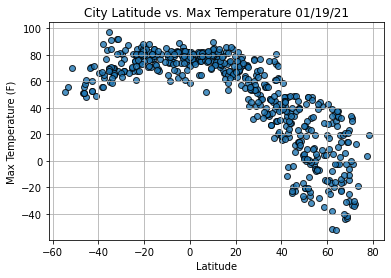

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

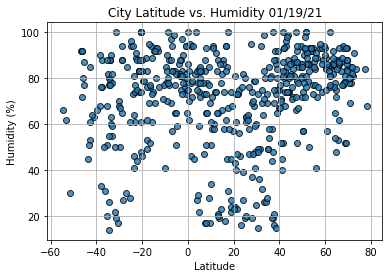

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

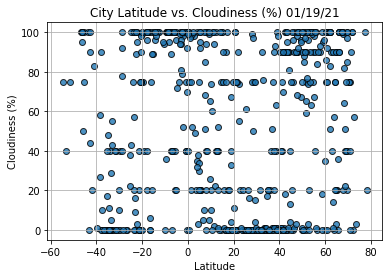

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid